<a href="https://colab.research.google.com/github/alphacoderds/House-Price-Prediction_Support-Vector-Regression-Methode/blob/main/SVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
pd.set_option('display.max_colwidth', None)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Menelusuri Direktori dan Menampilkan Daftar File
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
#Membaca File CSV dan Menampilkan Data Awal
df = pd.read_csv('USA_Housing.csv')
print(df.head())

   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     26354.109472  6.309435e+05   

                                                Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 37010-5101  
1  188 Johnson Views Suite 079\nLake Kathleen, CA 48958  
2 

In [ ]:
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 37010-5101"
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA 48958"
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482-3489"
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01707-9165"
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [ ]:
#menampilkan 5 baris terakhir dari kolom 'Address' pada DataFrame
df['Address'].tail()

,Address
4995,USNS Williams\nFPO AP 30153-7653
4996,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,"4215 Tracy Garden Suite 076\nJoshualand, VA 01707-9165"
4998,USS Wallace\nFPO AE 73316
4999,"37778 George Ridges Apt. 509\nEast Holly, NV 29290-3595"


In [ ]:
def extract_address(x):
    try:
        address = x.split('\n')[1].split(',')[1].split()[0]
    except IndexError:
        address = x.split('\n')[1].split(" ")[1]
    return address

In [ ]:
#mengekstrak alamat dari sebuah string teks yang memiliki format
df['Address'] = df['Address'].apply(extract_address)
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,NE
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,CA
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,WI
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,AP
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,AE
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,AP
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,AA
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,VA
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,AE


In [ ]:
#menghitung jumlah nilai unik yang ada di kolom 'Address'
df['Address'].nunique()

62

In [ ]:
#memberikan ringkasan statistik deskriptif
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


<Axes: >

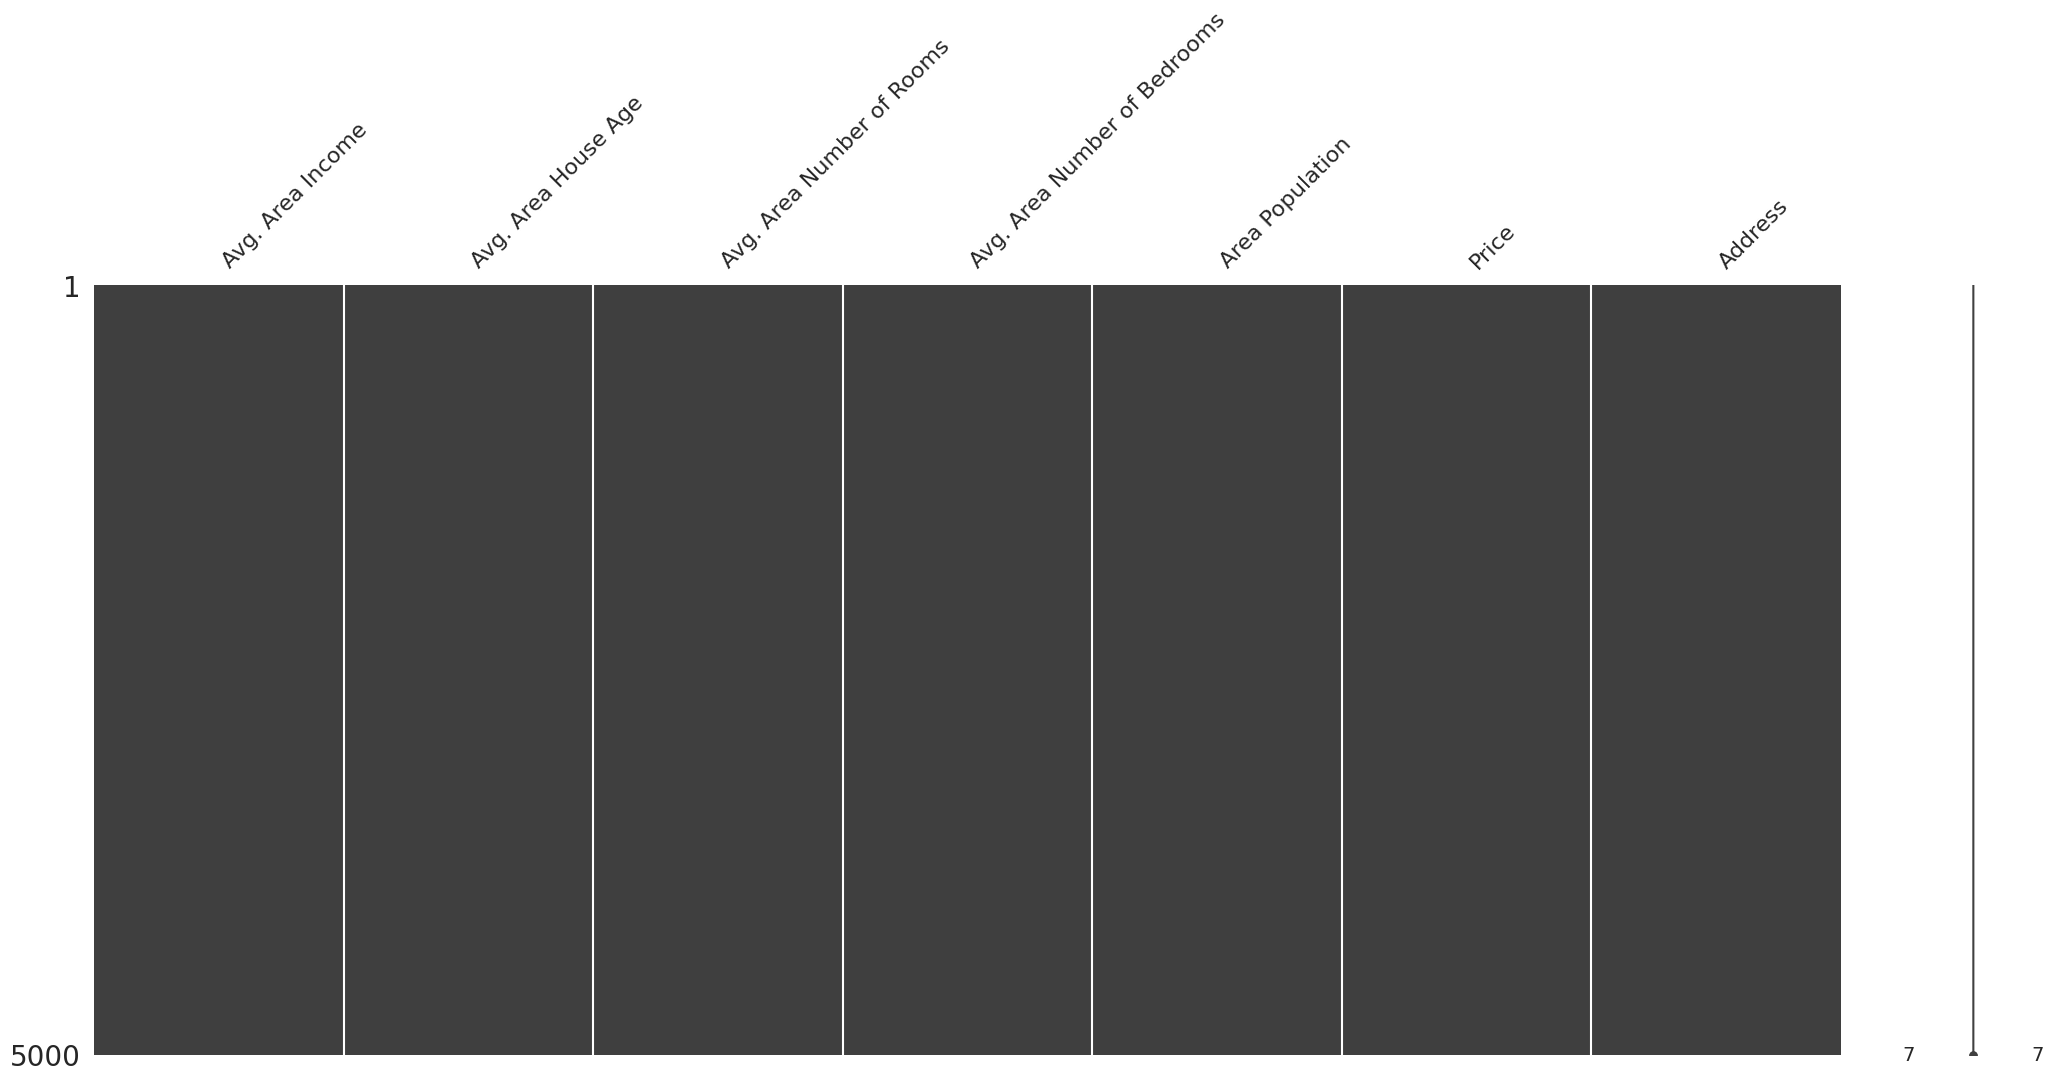

In [ ]:
#visualisasi data yang hilang (missing values) dalam sebuah dataset
import missingno as msno
msno.matrix(df)

In [ ]:
# menghasilkan warna acak dalam format hexadecimal
import random
def random_color():
    r = lambda: random.randint(0,255)
    return '#%02X%02X%02X' % (r(),r(),r())

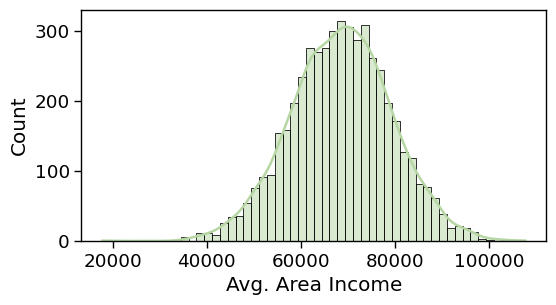

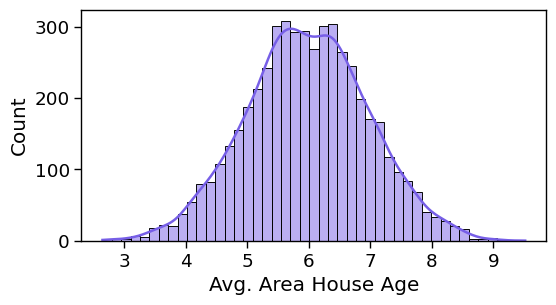

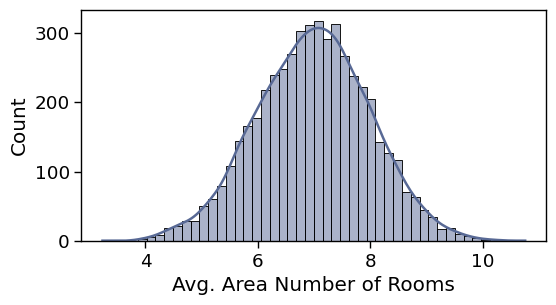

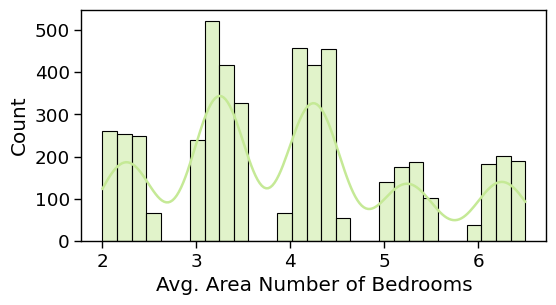

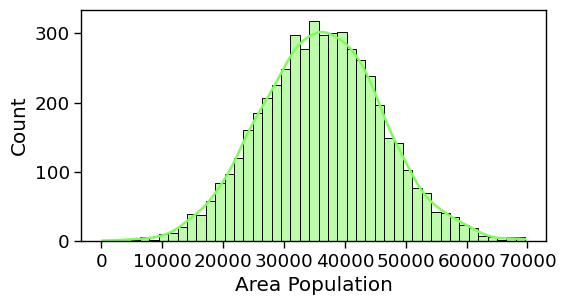

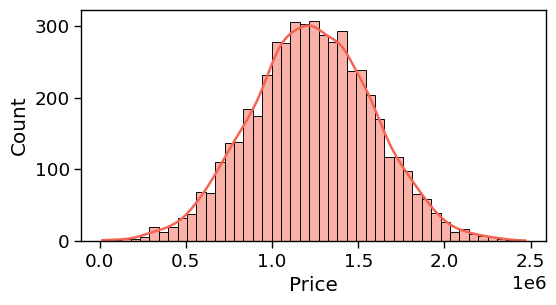

In [ ]:
# membuat histogram dari setiap kolom pada dataset
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 1.8})
for i in df.columns[:-1]:
    fig,ax = plt.subplots(figsize = (6,3))
    sns.histplot(df[i],kde = True,color = random_color())

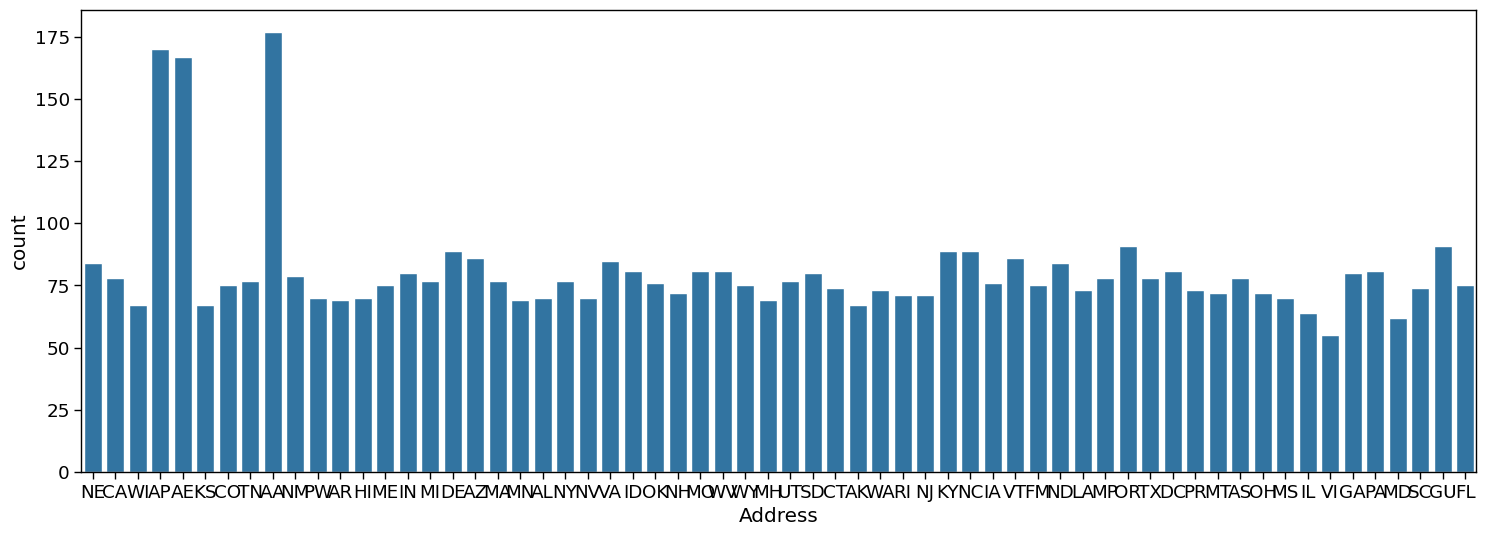

In [ ]:
#membuat plot grafik count (grafik hitung) untuk menampilkan distribusi jumlah entri berdasarkan kolom address
fig,ax = plt.subplots(figsize = (18,6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Address", data=df)

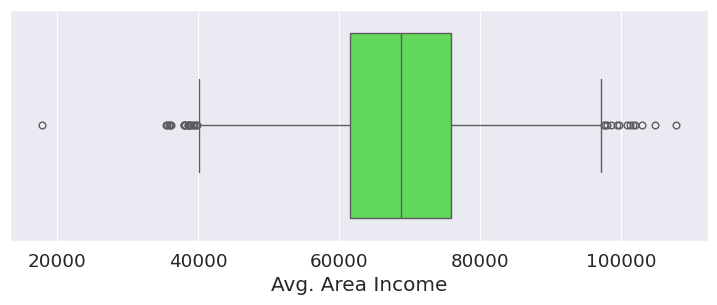

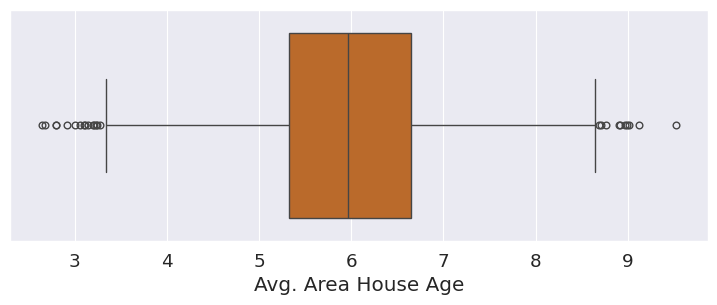

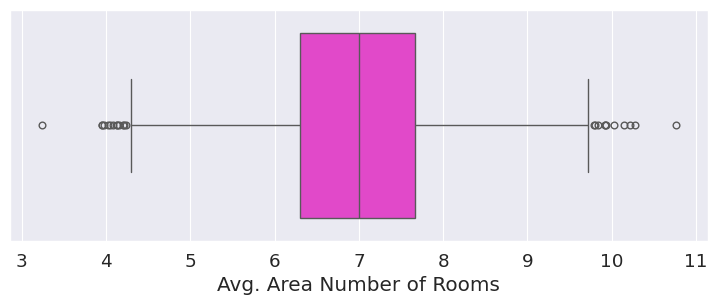

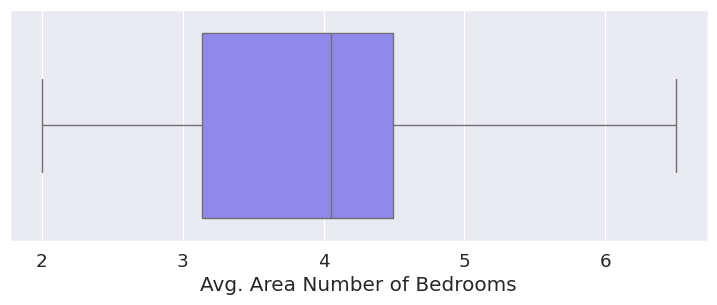

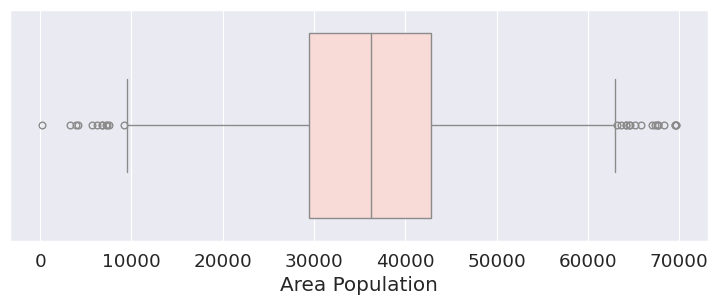

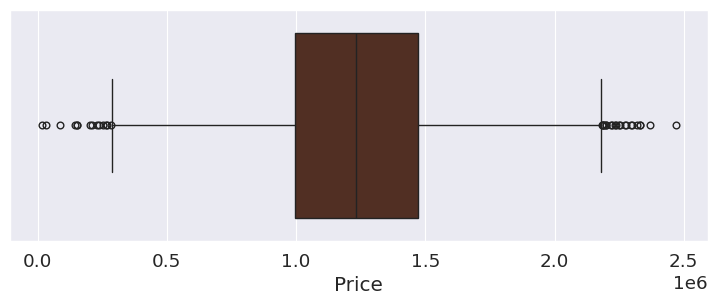

In [ ]:
#membuat box plot yang memvisualisasikan distribusi data dari kolom-kolom dalam DataFrame
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 1.8})
for i in df.columns[:-1]:
    fig,ax = plt.subplots(figsize = (9,3))
    color = np.random.rand(3,)
    ax = sns.boxplot(x=df[i],color = random_color())

In [ ]:
# untuk membuat visualisasi dua variabel yang berkaitan (bivariate) antara sebuah kolom data dengan harga (Price
def bivariate_plot(column,color):
    sns.set_context("paper", font_scale=1.8, rc={"lines.linewidth": 1.8})
    sns.set_style('white')
    import scipy.stats
    fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize = (21,6))
    sns.regplot(data = df,x=column, y='Price',ax = ax1,color = color,line_kws ={'color' :'red'})
    sns.kdeplot(data=df,x=column,y="Price",ax =ax2,color = color,)
    df.plot.hexbin(x=column, y='Price', gridsize=9,ax = ax3,cmap=plt.cm.Blues)
    fig.suptitle(column, fontsize=18)
    sns.despine()
    plt.show()
    print('Pearson\' correlation coefficient :',df[column].corr(df['Price']))
    print('Spearman\'s correlation coefficient :',df[column].corr(df['Price'],method = 'spearman'))
    print('Kendall\'s correlation coefficient :',df[column].corr(df['Price'],method = 'kendall'))

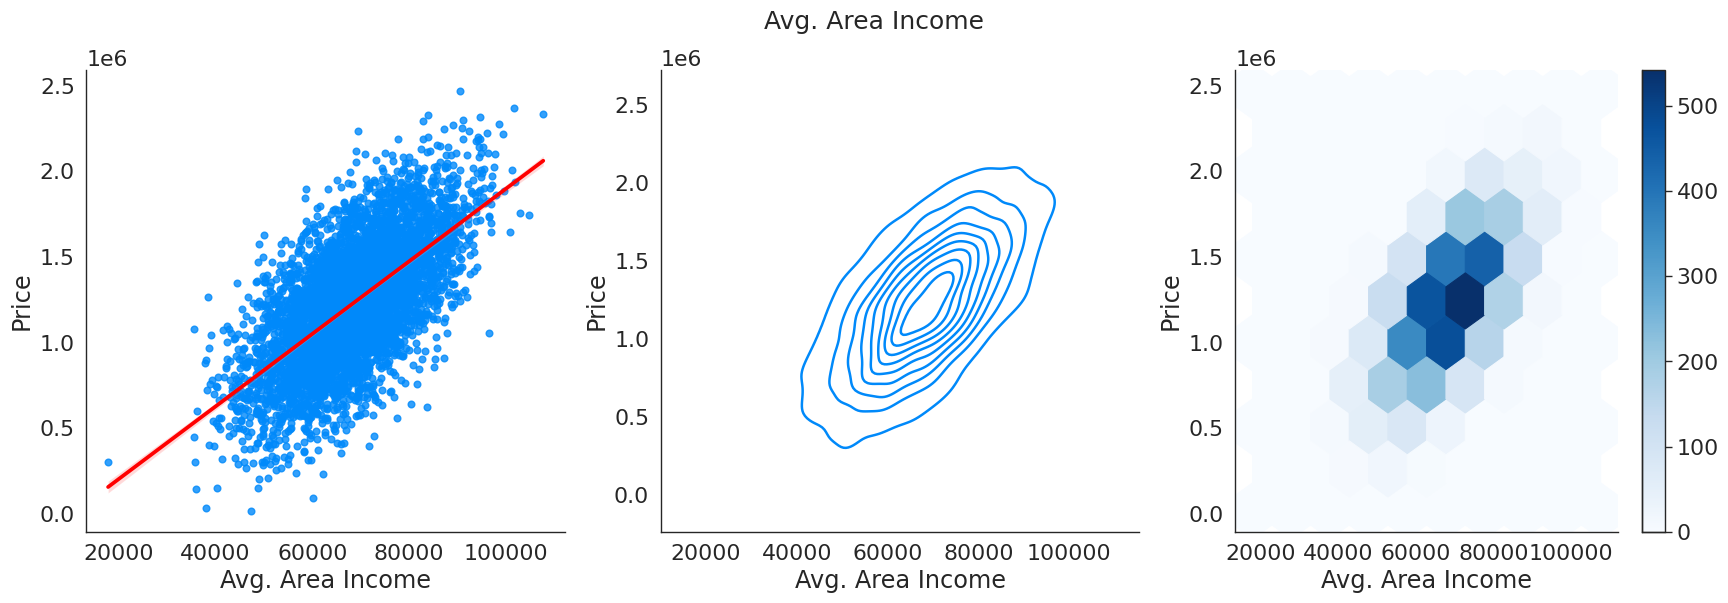

Pearson' correlation coefficient : 0.6397337782498941
Spearman's correlation coefficient : 0.6199618621744744
Kendall's correlation coefficient : 0.4407702340468094


In [ ]:
# memanggil fungsi bivariate_plot
bivariate_plot('Avg. Area Income','#0089fa')

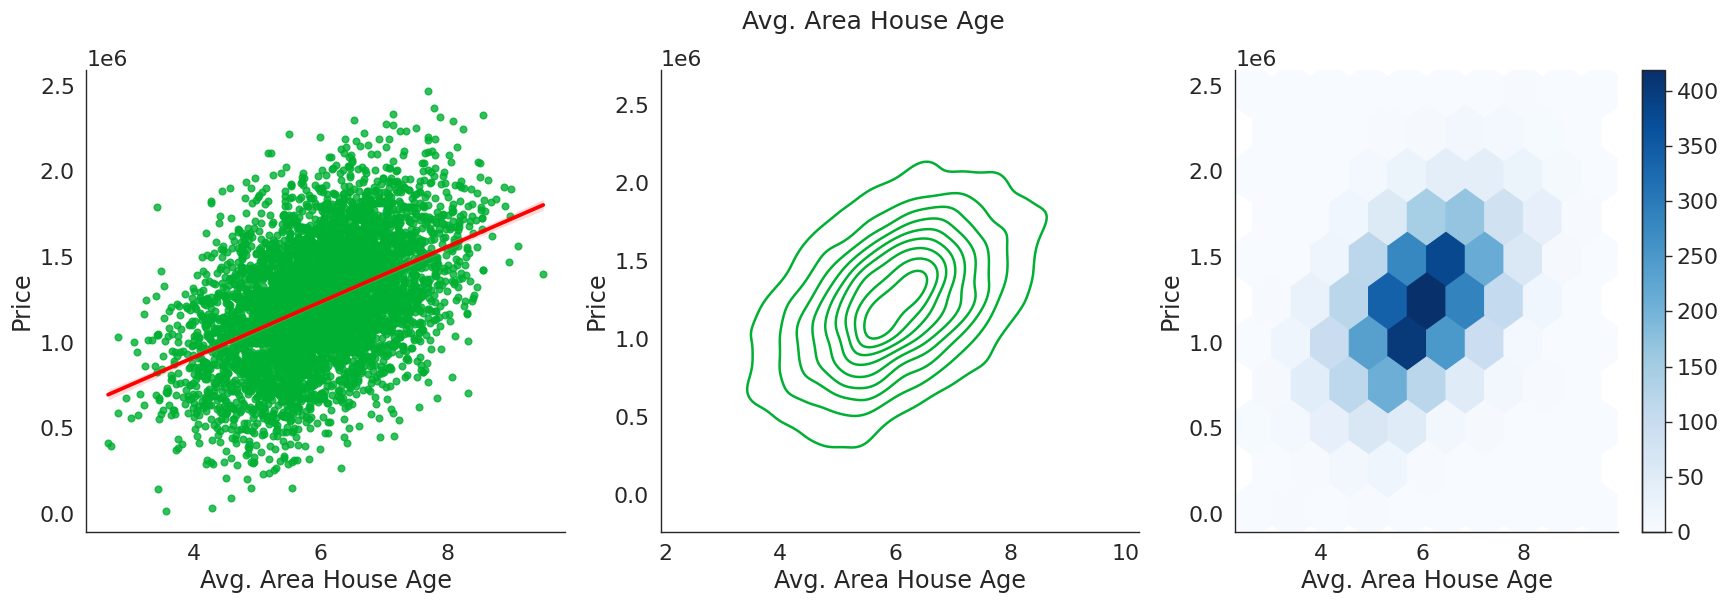

Pearson' correlation coefficient : 0.4525425371787558
Spearman's correlation coefficient : 0.4427245926209837
Kendall's correlation coefficient : 0.30346661332266456


In [ ]:
# menghasilkan sebuah plot bivariate (dua variabel) yang menggambarkan hubungan antara dua fitur
bivariate_plot('Avg. Area House Age','#00b032')

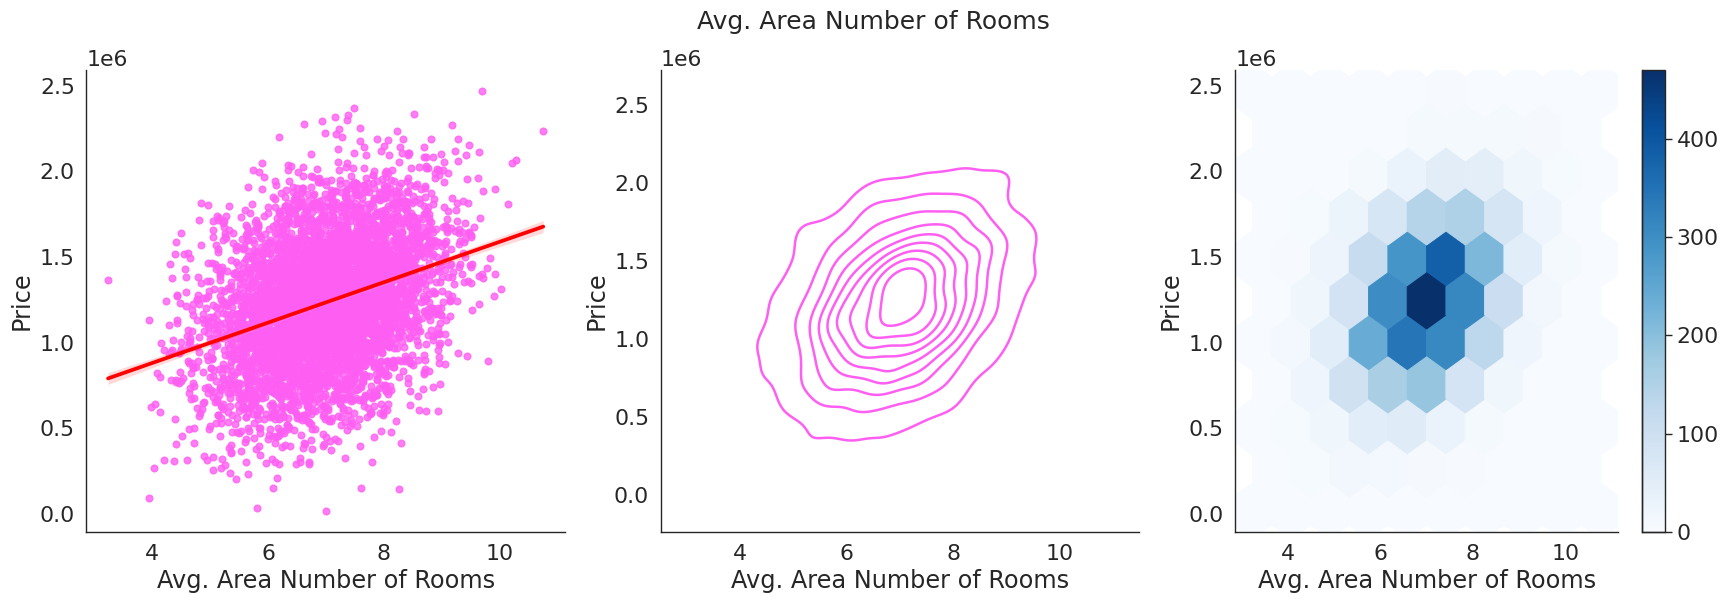

Pearson' correlation coefficient : 0.3356644533667596
Spearman's correlation coefficient : 0.3179236691969467
Kendall's correlation coefficient : 0.21595695139027807


In [ ]:
#menghasilkan grafik bivariate (grafik yang menunjukkan hubungan antara dua variabel)
bivariate_plot('Avg. Area Number of Rooms','#ff5ef2')

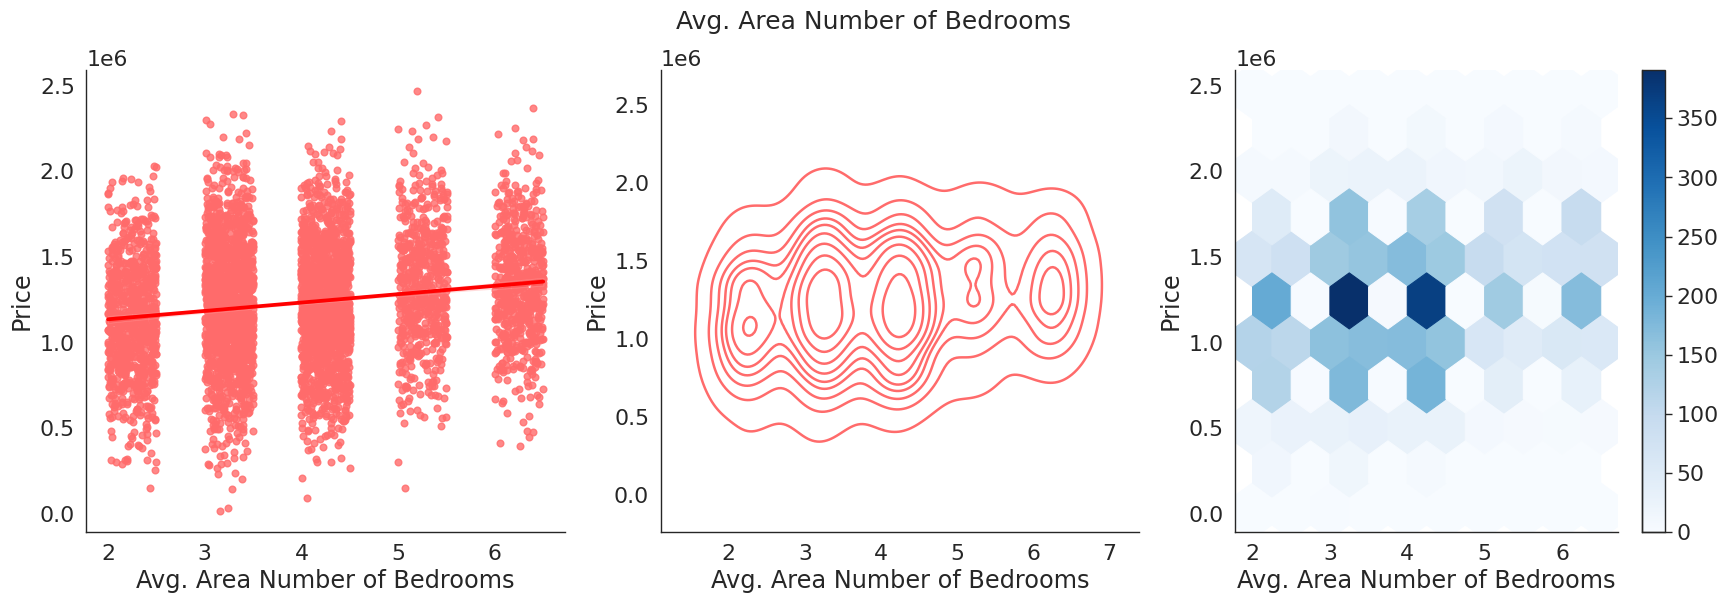

Pearson' correlation coefficient : 0.17107102765855595
Spearman's correlation coefficient : 0.1581727049551064
Kendall's correlation coefficient : 0.10542909856797184


In [ ]:
#menghasilkan grafik bivariate (grafik yang menunjukkan hubungan antara dua variabel)
bivariate_plot('Avg. Area Number of Bedrooms','#ff6b6b')

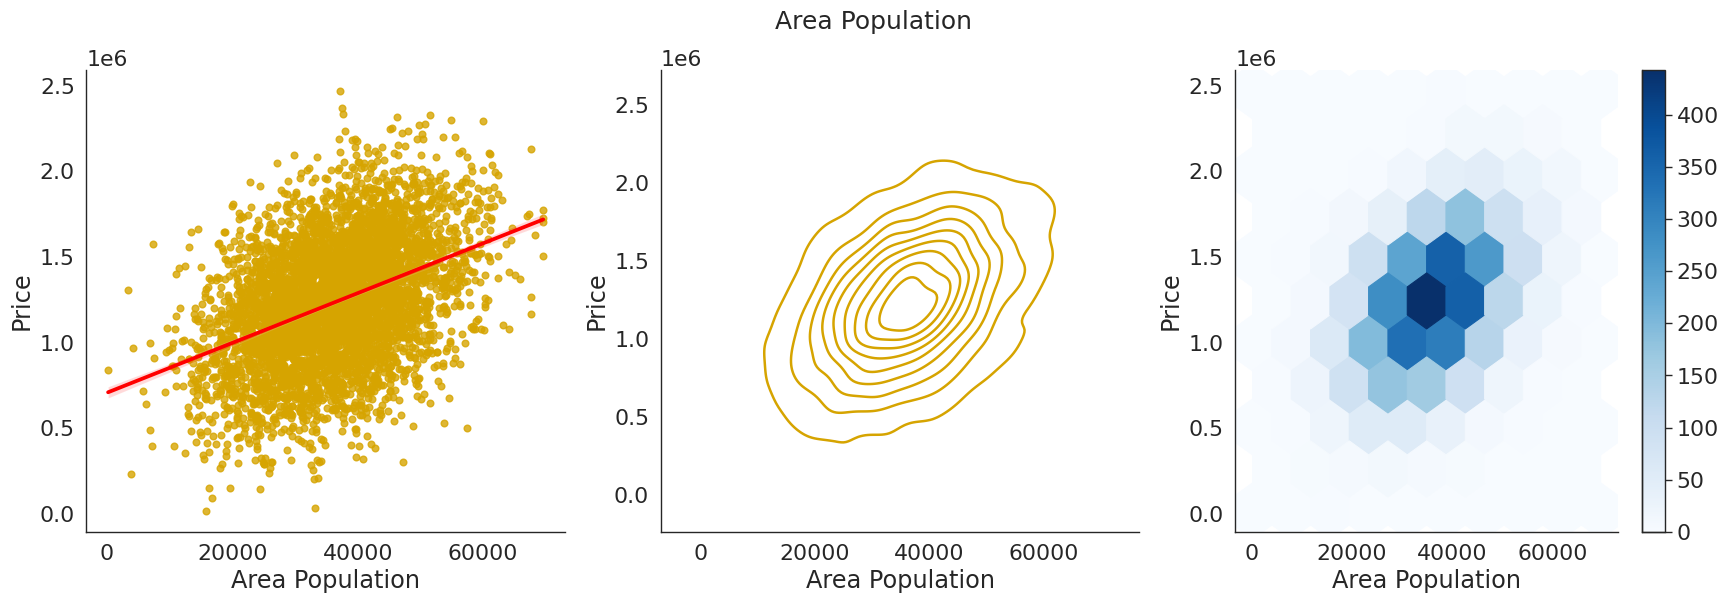

Pearson' correlation coefficient : 0.4085558793165562
Spearman's correlation coefficient : 0.3946491364259654
Kendall's correlation coefficient : 0.2696123224644929


In [ ]:
#menghasilkan grafik bivariate (grafik yang menunjukkan hubungan antara dua variabel)
bivariate_plot('Area Population','#d6a400')

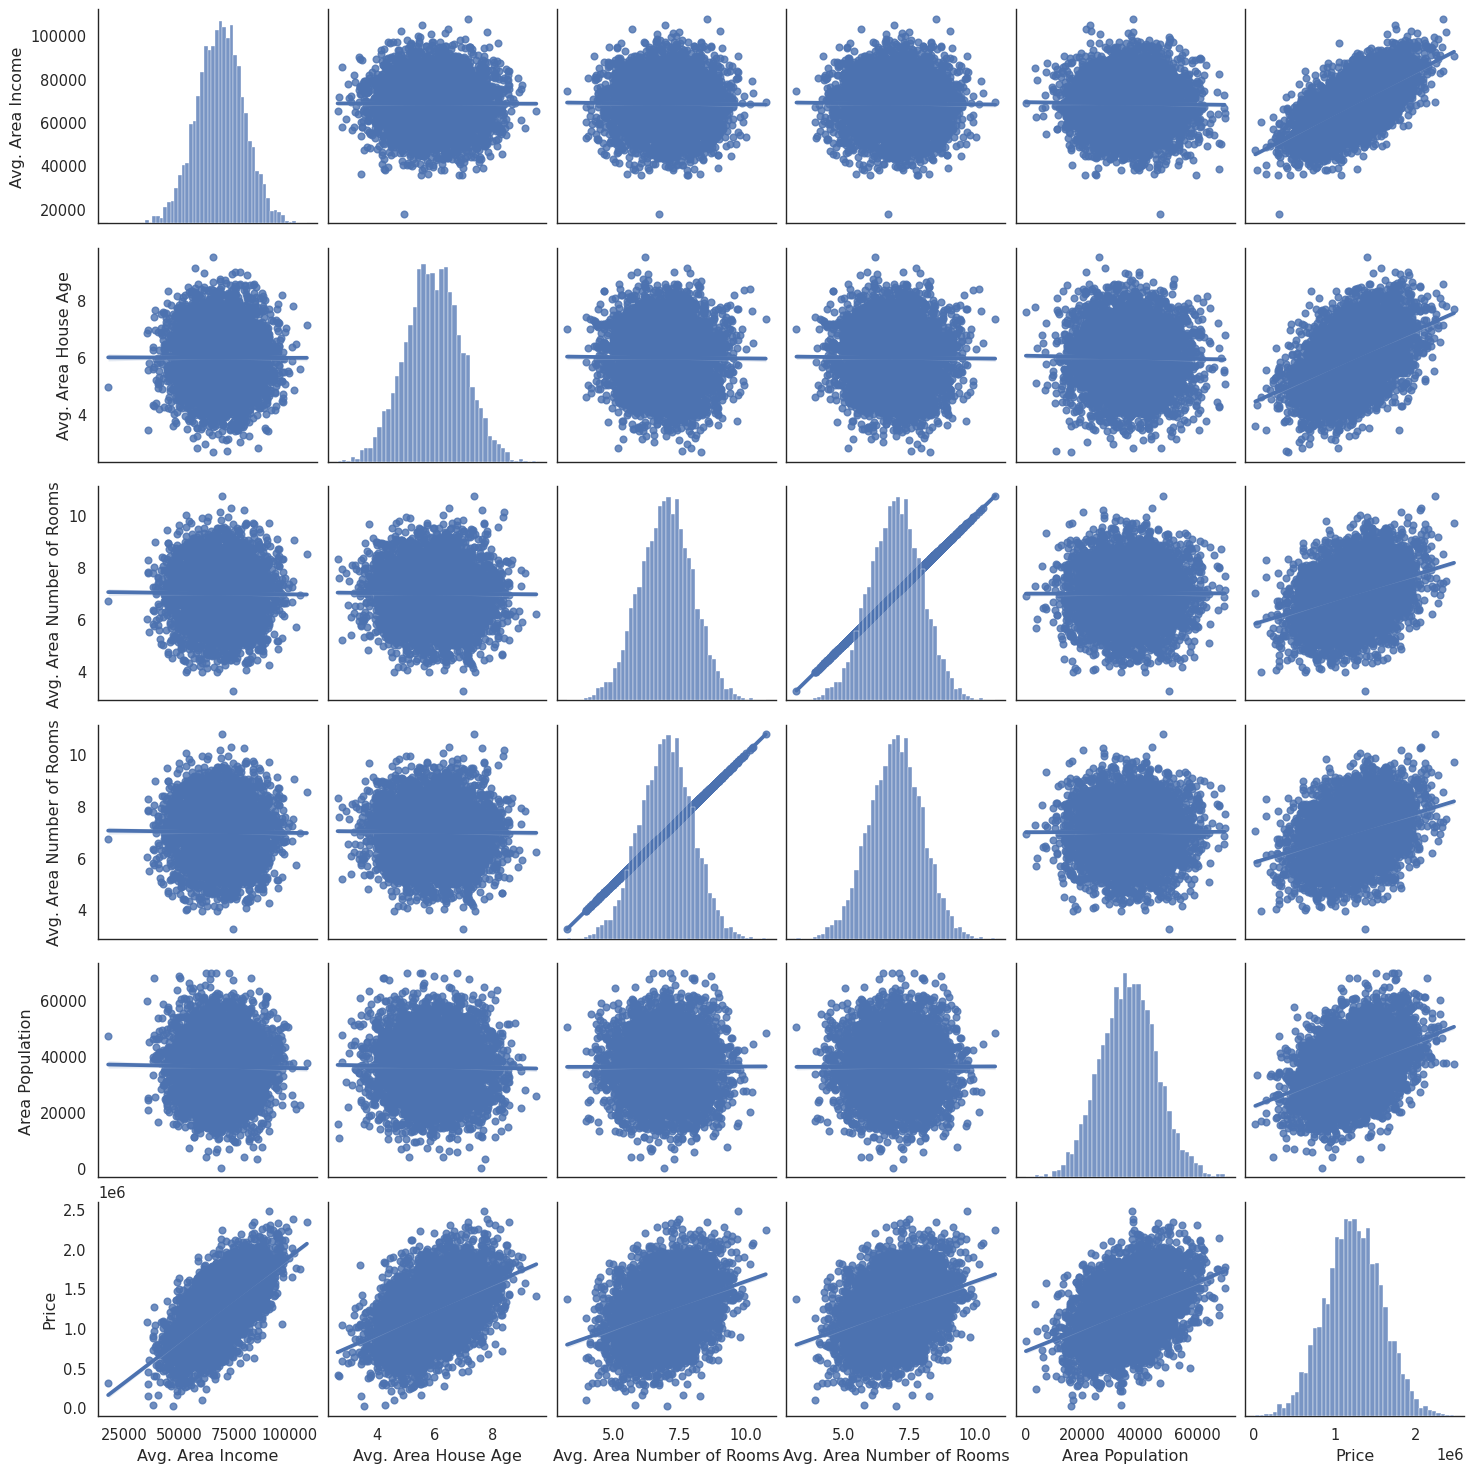

In [ ]:
#visualisasi hubungan antara beberapa fitur dalam dataset USA Housing menggunakan Seaborn
sns.set_context("paper", font_scale=1.2, rc={"lines.linewidth": 1.8})
sns.pairplot(df,vars = ['Avg. Area Income',
                        'Avg. Area House Age','Avg. Area Number of Rooms',
                        'Avg. Area Number of Rooms','Area Population','Price'],kind= 'reg')

Text(0.5, 1.0, 'Address Vs Price')

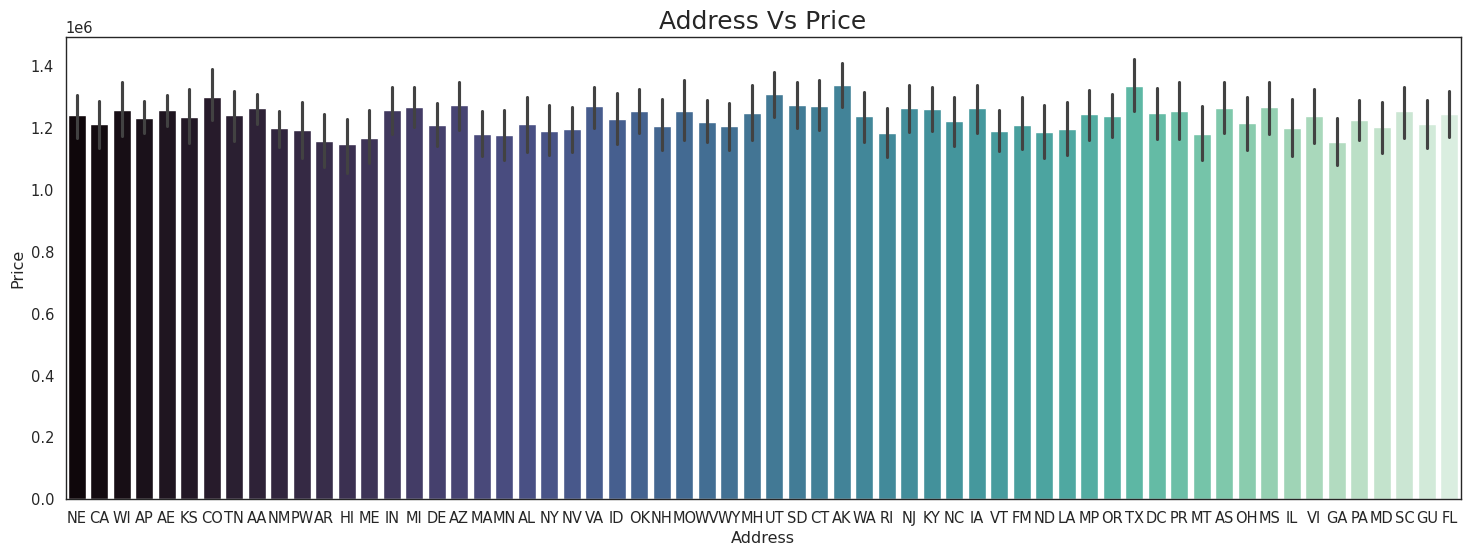

In [ ]:
#membuat sebuah grafik batang (barplot) menggunakan seaborn dan matplotlib
fig,ax = plt.subplots(figsize = (18,6))
sns.set_theme(style="darkgrid")
ax = sns.barplot(x="Address", y="Price", data=df,palette = 'mako')
ax.set_title('Address Vs Price',size = 18)

Text(0.5, 1.0, 'Address Vs Area Population')

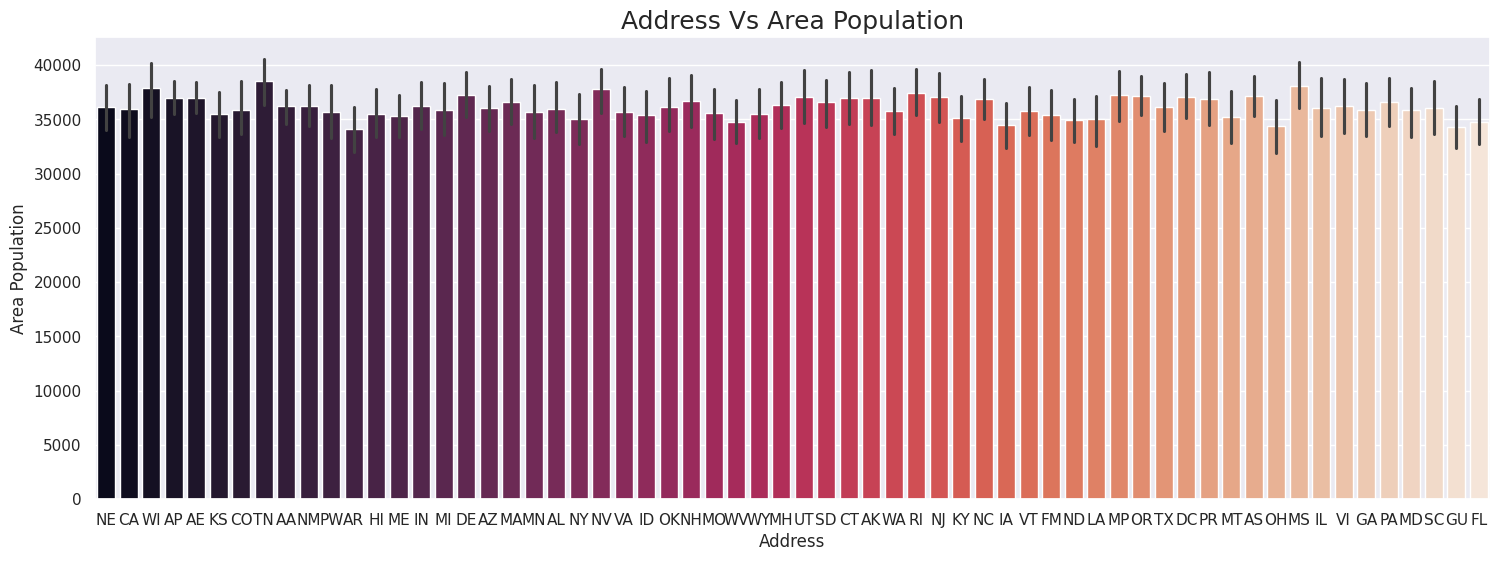

In [ ]:
#membuat bar plot (grafik batang) yang menggambarkan hubungan antara kolom
fig,ax = plt.subplots(figsize = (18,6))
sns.set_theme(style="darkgrid")
ax = sns.barplot(x="Address", y="Area Population", data=df,palette = 'rocket')
ax.set_title('Address Vs Area Population',size = 18)

In [ ]:
#analisis korelasi antara kolom-kolom data numerik
df = df.select_dtypes(include=['number'])
corr = df.corr(method='pearson')
print(corr)

                              Avg. Area Income  Avg. Area House Age  \
Avg. Area Income                      1.000000            -0.002007   
Avg. Area House Age                  -0.002007             1.000000   
Avg. Area Number of Rooms            -0.011032            -0.009428   
Avg. Area Number of Bedrooms          0.019788             0.006149   
Area Population                      -0.016234            -0.018743   
Price                                 0.639734             0.452543   

                              Avg. Area Number of Rooms  \
Avg. Area Income                              -0.011032   
Avg. Area House Age                           -0.009428   
Avg. Area Number of Rooms                      1.000000   
Avg. Area Number of Bedrooms                   0.462695   
Area Population                                0.002040   
Price                                          0.335664   

                              Avg. Area Number of Bedrooms  Area Population  \
Avg. Area

<Axes: >

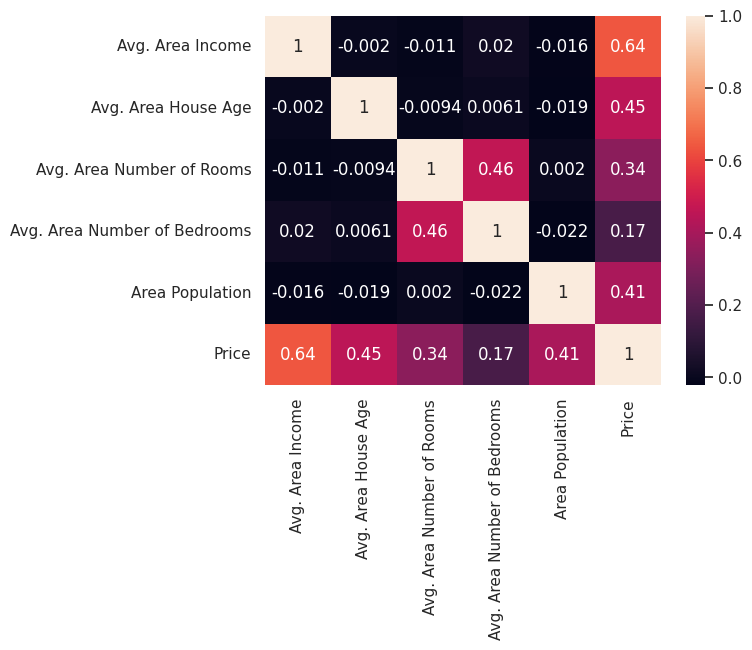

In [ ]:
#visualisasi korelasi antar variabel pada sebuah dataset
sns.heatmap(corr,xticklabels = corr.columns,yticklabels = corr.columns,annot=True)

In [ ]:
#menghapus outlier (nilai yang jauh berbeda dari data lainnya)
def remove_outliers(df):
    outliers = {}
    for col in df.columns:
        if str(df[col].dtype) != 'object':
            df = df[np.abs(df[col]-df[col].mean()) < (3*df[col].std())]
            olrs = df[~(np.abs(df[col]-df[col].mean()) < (3*df[col].std()))]
            outliers = pd.DataFrame(olrs)
    return df
df_outlier = remove_outliers(df)

In [ ]:
#menghasilkan dua jenis visualisasi diagnostik pada distribusi data dari suatu variabel
def diagnostic_plots(df, variable):

    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.suptitle(variable, fontsize=16)
    plt.show()

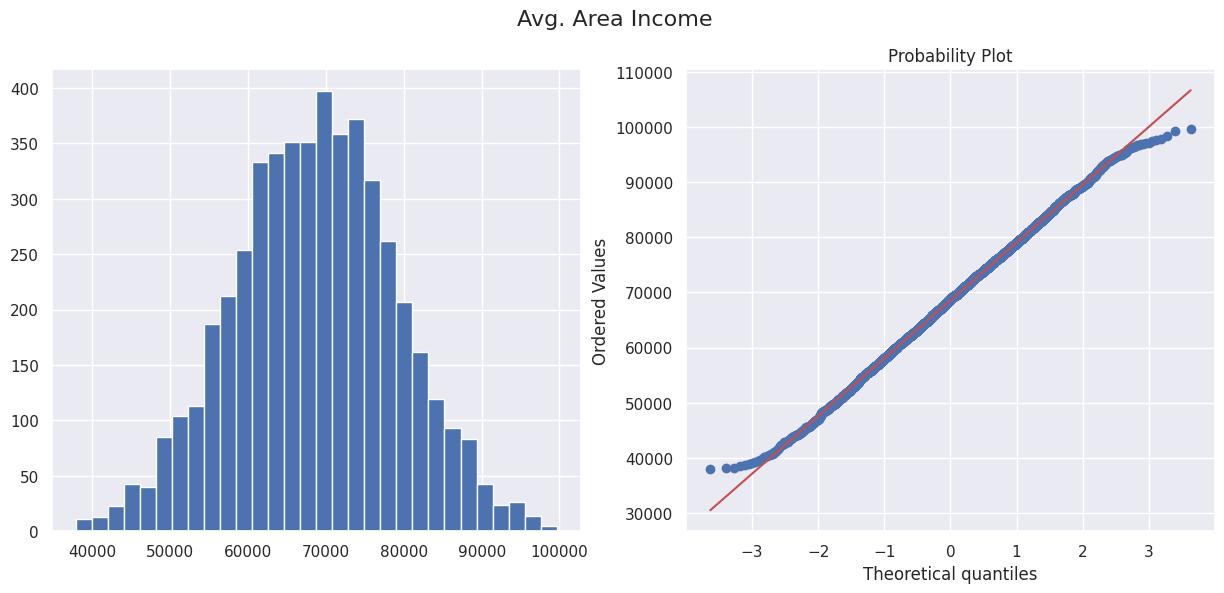

In [ ]:
#menghasilkan visualisasi diagnostik terkait dengan kolom 'Avg. Area Income'
diagnostic_plots(df_outlier, 'Avg. Area Income')

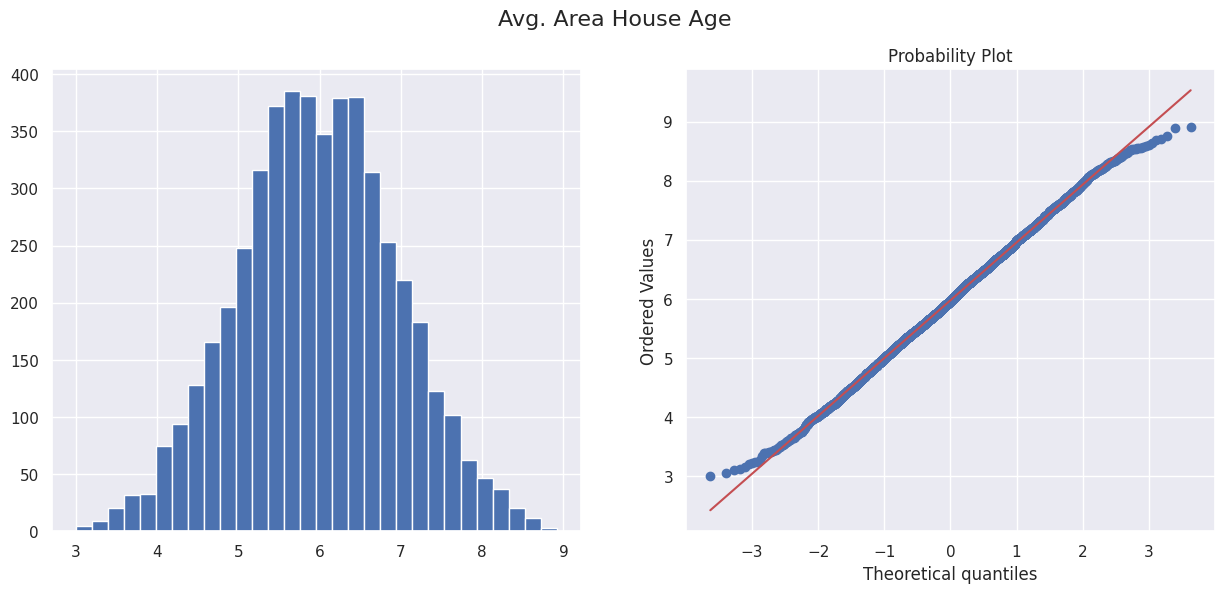

In [ ]:
#menghasilkan visualisasi diagnostik terkait dengan kolom 'Avg. Area House Age'
diagnostic_plots(df_outlier, 'Avg. Area House Age')

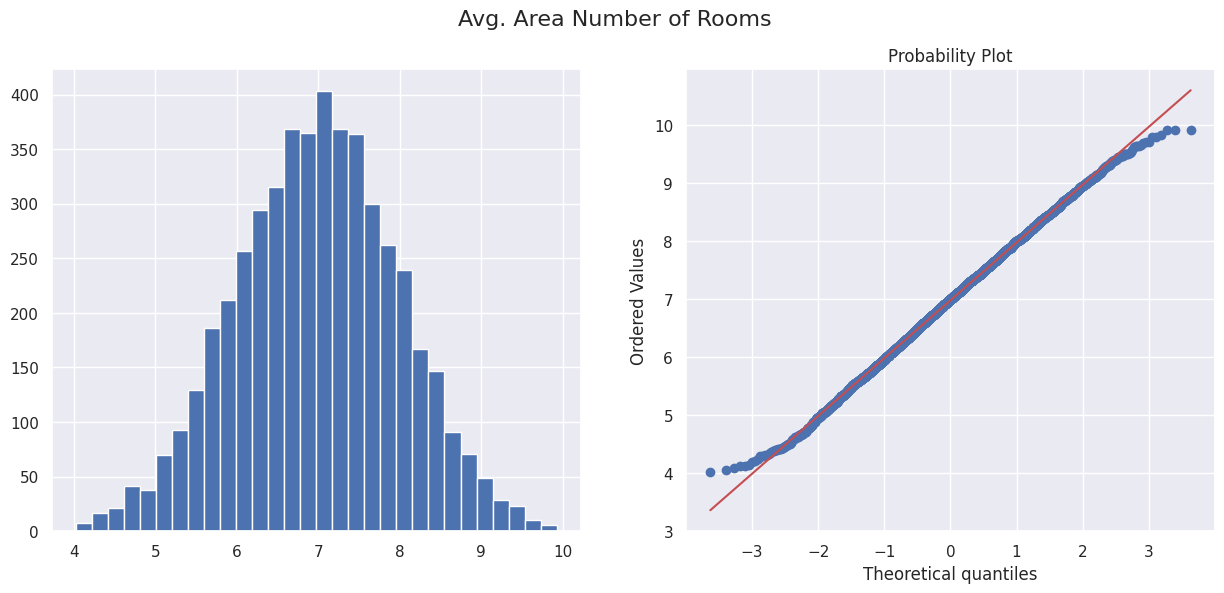

In [ ]:
#menghasilkan visualisasi diagnostik terkait dengan kolom 'Avg. Area Number of Rooms'
diagnostic_plots(df_outlier, 'Avg. Area Number of Rooms')

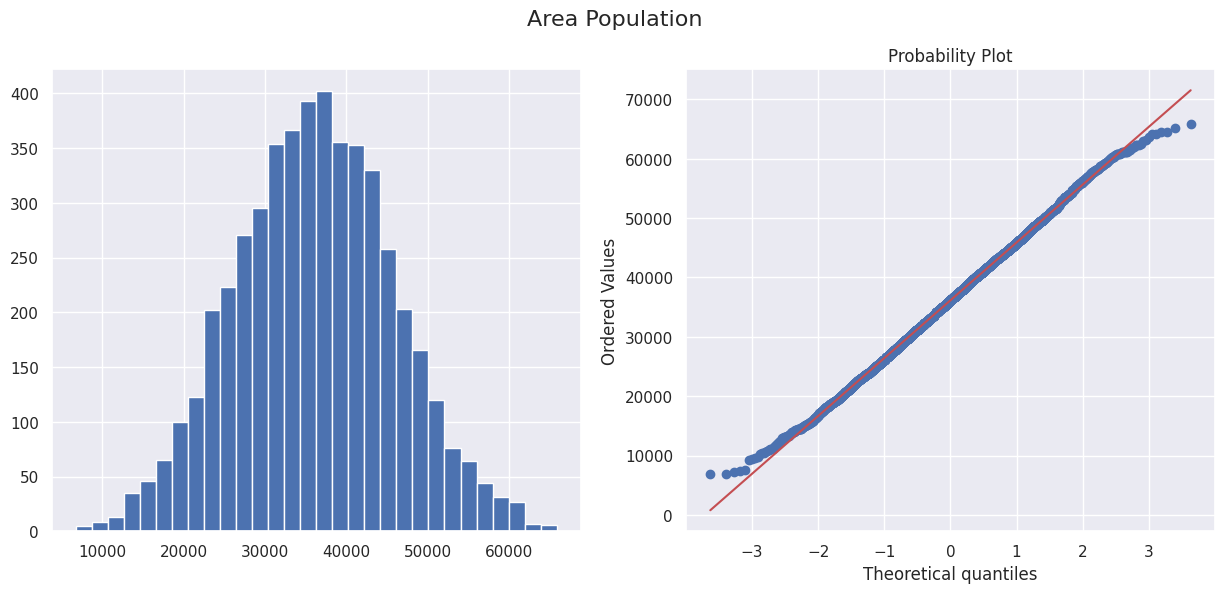

In [ ]:
#menghasilkan visualisasi diagnostik terkait dengan kolom 'Area Population'
diagnostic_plots(df_outlier, 'Area Population')

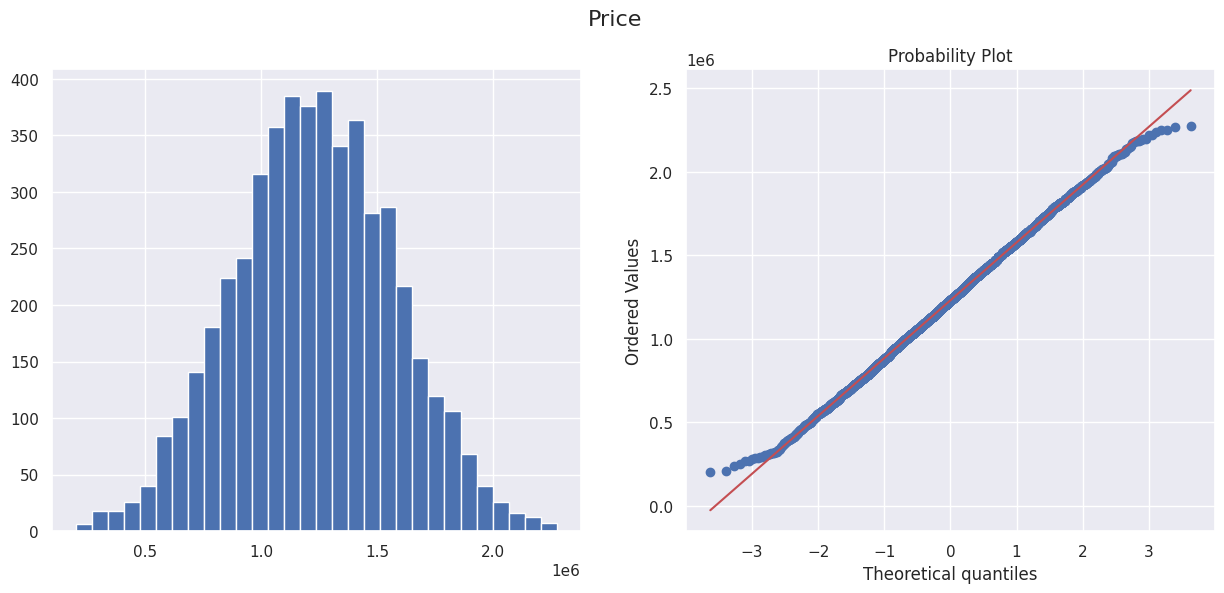

In [ ]:
# menghasilkan visualisasi diagnostik terkait dengan kolom 'Price'
diagnostic_plots(df_outlier, 'Price')

In [ ]:
#transformasi logaritma pada variabel target
y = df_outlier['Price']
#log transform target variable
y = np.log1p(y)

In [ ]:
#membagi dataset menjadi dua bagian: satu untuk pelatihan (training) dan satu untuk pengujian (testing
from sklearn.model_selection import train_test_split

In [ ]:
#membagi dataset menjadi dua bagian data latin dan data uji
X_train, X_test, y_train, y_test = train_test_split(
    df_outlier.drop(['Price', 'Address'], axis=1, errors='ignore'),
    y,
    test_size=0.3,
    random_state=0
)


In [ ]:
#normalisasi data atau penyusunan ulang skala data
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# normalisasi data
scaler = MinMaxScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [ ]:
#cross-validation untuk mengevaluasi performa model
from sklearn.model_selection import cross_val_score
model_performance = {}

In [ ]:
#mengevaluasi hasil prediksi model regresi
from sklearn import metrics
def print_evaluate(true,predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)

In [ ]:
#memvisualisasikan hasil prediksi model regresi dengan cara membandingkan nilai aktual
def plot(Model,test_pred):
    fig,ax = plt.subplots(figsize = (9,6))
    plt.scatter(y_test, test_pred, c='#0097e3',s = 6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', c='red', lw=2.7)
    plt.xlabel('Actuals')
    plt.ylabel('Predicted Values')
    plt.title('Actuals Vs Predicted Values')
    plt.suptitle(Model,fontsize = 16)
    plt.show()


In [ ]:
from sklearn.svm import SVR

In [ ]:
#buat model SVR dengan kernel linear
regr = SVR(kernel = 'linear')

In [ ]:
regr.fit(X_train_std, y_train)

SVR(kernel='linear')

In [ ]:
#memprediksi hasil dari model regresi
test_pred = regr.predict(X_test_std)
train_pred = regr.predict(X_train_std)

In [ ]:
# menampilkan hasil evaluasi model regresi pada data uji (test) dan data pelatihan (train)
print("------TEST------")
print()
print_evaluate(y_test,test_pred)
print()
print("------TRAIN------")
print_evaluate(y_train,train_pred)

------TEST------

MAE: 0.08229890994107025
MSE: 0.012341559519808098
RMSE: 0.11109257184802275
R2 Square 0.8709748297860203

------TRAIN------
MAE: 0.0853118249437362
MSE: 0.014395151279004325
RMSE: 0.11997979529489257
R2 Square 0.8592140378413412


In [ ]:
#mendefinisikan dictionary parameters, yang berisi daftar hyperparameter dan nilai-nilai yang akan diuji dalam proses hyperparameter tuning
parameters = {
    'kernel' :['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma' : ['scale','auto'],

}

In [ ]:
#digunakan untuk hyperparameter tuning pada model Support Vector Regression (SVR) menggunakan GridSearchCV dari pustaka scikit-learn
gridsearch = GridSearchCV(SVR(), parameters)
gridsearch.fit(X_train_std, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [ ]:
#digunakan dalam konteks hyperparameter tuning menggunakan GridSearchCV dari pustaka scikit-learn
gridsearch.best_params_

{'gamma': 'scale', 'kernel': 'rbf'}

In [ ]:
#building the best SVR() mdoel
regr = SVR(kernel = 'rbf',gamma = 'scale')
regr.fit(X_train_std, y_train)

SVR()

In [ ]:
#menghasilkan prediksi model pada dataset uji dan dataset latih menggunakan model regresi
test_pred = regr.predict(X_test_std)
train_pred = regr.predict(X_train_std)

In [ ]:
#mengevaluasi performa model dengan cara membandingkan nilai sebenarnyadengan nilai prediksi (test_pred atau train_pred)
print("------TEST------")
print()
print_evaluate(y_test,test_pred)
print()
print("------TRAIN------")
print_evaluate(y_train,train_pred)

------TEST------

MAE: 0.07555177685169473
MSE: 0.009801142538944168
RMSE: 0.09900071989104002
R2 Square 0.8975336883196093

------TRAIN------
MAE: 0.07373680989005052
MSE: 0.0095434452472831
RMSE: 0.09769055863942584
R2 Square 0.9066641888364954


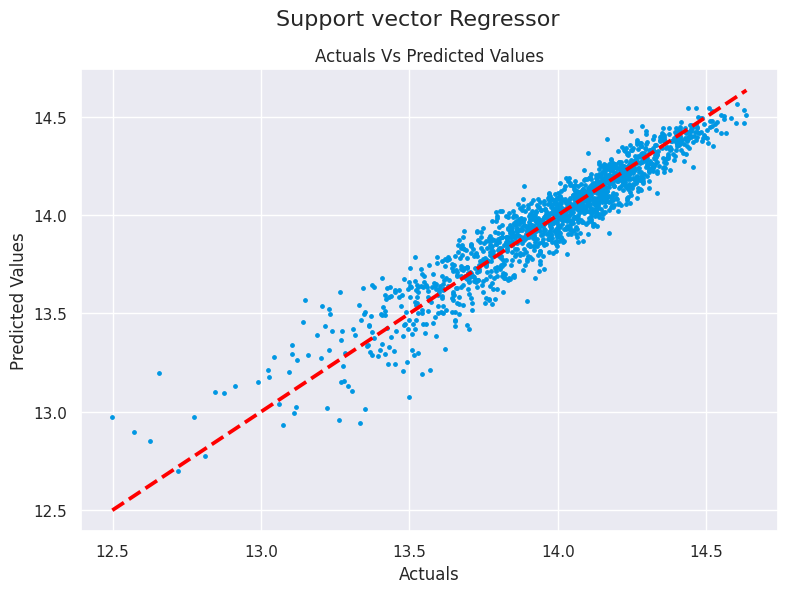

In [ ]:
#visualisasi hasil prediksi dari model Support Vector Regressor
plot('Support vector Regressor',test_pred)

# New Section